# Classification using TensorFlow tf.estimator API (Income >50k or <=50k?)

### Problem Statement:
We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

### Dataset
California Census Data

### Highlights:
1. Clean the data first: Normalize features, convert continuous variable `age` into a categorical feature (Use pandas to load csv and perform data engineering)
2. Use tf.estimator api to perform classification.
 

In [21]:
import tensorflow as tf
import pandas as pd

dataset = pd.read_csv("datasets/census_data.csv")
dataset.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Feature Engineering 
- Convert categorical features to numeric, and continuous to categorical
- Scale features so all of them are between 0 and 1

In [22]:
len(dataset["education"].unique())

16

In [23]:
# Columns: [
# 'age', 'workclass', 'education', 'education_num', 'marital_status', 
# 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 
# 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']

# Numerical Features:
capital_gain = tf.feature_column.numeric_column(key="capital_gain")
capital_loss = tf.feature_column.numeric_column(key="capital_loss")
hours_per_week = tf.feature_column.numeric_column(key="hours_per_week")
education_num = tf.feature_column.numeric_column(key="education_num")

# Categorical Features:
workclass = tf.feature_column.categorical_column_with_hash_bucket(key="workclass", hash_bucket_size=100)
education = tf.feature_column.categorical_column_with_hash_bucket(key="education", hash_bucket_size=100)
marital_status = tf.feature_column.categorical_column_with_hash_bucket(key="marital_status", hash_bucket_size=5)
occupation = tf.feature_column.categorical_column_with_hash_bucket(key="occupation", hash_bucket_size=100)
relationship = tf.feature_column.categorical_column_with_hash_bucket(key="relationship", hash_bucket_size=10)
race = tf.feature_column.categorical_column_with_hash_bucket(key="race", hash_bucket_size=100)
gender = tf.feature_column.categorical_column_with_hash_bucket(key="gender", hash_bucket_size=10)
native_country = tf.feature_column.categorical_column_with_hash_bucket(key="native_country", hash_bucket_size=300)

## 3. Convert `age` into categorical feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273FC242F48>]],
      dtype=object)

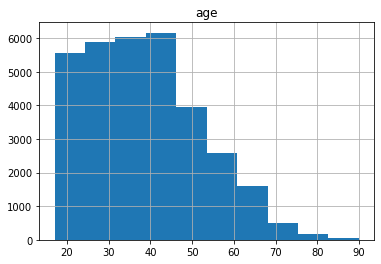

In [24]:
import matplotlib.pyplot as plt

dataset.hist(column="age")

In [25]:
age =  tf.feature_column.numeric_column(key="age")

age_categorical = tf.feature_column.bucketized_column(
    boundaries=[10,20,30,40,50,60,70,80,90,100,110,120,130,140], source_column=age
)

## 4. Remove space from `income_bracket` feature

In [26]:
print(dataset["income_bracket"].unique())

dataset["income_bracket"] = dataset["income_bracket"].apply(lambda x : 0 if x==' <=50K' else 1)

dataset["income_bracket"].unique()

[' <=50K' ' >50K']


array([0, 1], dtype=int64)

In [27]:
feature_cols = [ 
    age_categorical, workclass, education, education_num, marital_status, occupation, relationship, 
    race, gender, capital_gain, capital_loss, hours_per_week, native_country]

## 6. Test Train split

In [28]:
from sklearn.model_selection import train_test_split

x_data = dataset.drop("income_bracket", axis=1)
y_data = dataset["income_bracket"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

## 5. Build the model and input function (Input functions for training, testing and prediction)

In [29]:
model = tf.estimator.LinearRegressor(feature_columns=feature_cols)

# Training Input Function:
train_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=100, num_epochs=None, shuffle=True)

# Test / Evaluation Input Functions:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, shuffle=False)

# Prediction Input Function:
predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, shuffle=False)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Obaid\\AppData\\Local\\Temp\\tmpuxbl6cqo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027382827088>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=train_input_func, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Obaid\AppData\Local\Temp\tmpuxbl6cqo\model.ckpt.
INFO:tensorflow:loss = 0.26, step = 0
INFO:tensorflow:global_step/sec: 118.608
INFO:tensorflow:loss = 0.18452564, step = 100 (0.847 sec)
INFO:tensorflow:global_step/sec: 242.718
INFO:tensorflow:loss = 0.18974891, step = 200 (0.411 sec)
INFO:tensorflow:global_step/sec: 240.672
INFO:tensorflow:loss = 0.18224636, step = 300 (0.415 sec)
INFO:tensorflow:global_step/sec: 247.221
INFO:tensorflow:loss = 0.15346321, step = 400 (0.405 sec)
INFO:tensorflow:global_step/sec: 234.745
INFO:tensorflow:loss = 0.15891114, step = 500 (0.427 sec)
INFO:tensorflow:global_step/sec: 215.284
INFO:tensorflow:loss = 0.11709795, step = 600 (0.464 sec)
INFO:tensorflow:global_step

In [31]:
metrics_eval = model.evaluate(input_fn=test_input_func)

metrics_eval

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-03T14:57:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Obaid\AppData\Local\Temp\tmpuxbl6cqo\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-03-14:57:50
INFO:tensorflow:Saving dict for global step 5000: average_loss = 0.120239444, global_step = 5000, label/mean = 0.24055687, loss = 0.12056554, prediction/mean = 0.23629521
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\Obaid\AppData\Local\Temp\tmpuxbl6cqo\model.ckpt-5000


{'average_loss': 0.120239444,
 'label/mean': 0.24055687,
 'loss': 0.12056554,
 'prediction/mean': 0.23629521,
 'global_step': 5000}

In [32]:
predictions = list(model.predict(input_fn = predict_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Obaid\AppData\Local\Temp\tmpuxbl6cqo\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [33]:
predictions[0]

{'predictions': array([0.43159753], dtype=float32)}